# Convolutional Neural Network

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 294s 1s/step - loss: 0.6643 - accuracy: 0.5989 - val_loss: 0.5950 - val_accuracy: 0.6845
Epoch 2/25
250/250 [==============================] - 53s 212ms/step - loss: 0.5979 - accuracy: 0.6777 - val_loss: 0.5784 - val_accuracy: 0.7010
Epoch 3/25
250/250 [==============================] - 54s 215ms/step - loss: 0.5512 - accuracy: 0.7178 - val_loss: 0.5381 - val_accuracy: 0.7370
Epoch 4/25
250/250 [==============================] - 54s 214ms/step - loss: 0.5211 - accuracy: 0.7434 - val_loss: 0.5019 - val_accuracy: 0.7630
Epoch 5/25
250/250 [==============================] - 52s 210ms/step - loss: 0.5035 - accuracy: 0.7501 - val_loss: 0.5092 - val_accuracy: 0.7540
Epoch 6/25
250/250 [==============================] - 53s 211ms/step - loss: 0.4859 - accuracy: 0.7636 - val_loss: 0.4897 - val_accuracy: 0.7700
Epoch 7/25
250/250 [==============================] - 53s 212ms/step - loss: 0.4665 - accuracy: 0.7766 - val_loss: 0.4855 - val_accu

## Part 4 - Making a single prediction

In [77]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image = load_img('dataset/dataset/test_set/cats/cat.4022.jpg', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [78]:
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 329ms/step


{'cats': 0, 'dogs': 1}

In [79]:
if result[0][0] == 1.0:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'

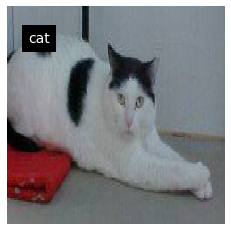

In [80]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image
image_path = 'dataset/dataset/test_set/cats/cat.4022.jpg'
test_image = load_img(image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)

# Display the image with the prediction as a centered text label
plt.imshow(test_image_array.astype('uint8'))
plt.text(32, 32, f"{prediction}", color='white', backgroundcolor='black', fontsize=14, horizontalalignment='center', verticalalignment='center')
plt.axis('off')  # Turn off axis labels
plt.show()

1/1 [==============================] - 2s 2s/step


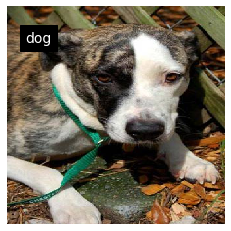

In [84]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image = load_img('dataset/dataset/test_set/dogs/dog.4066.jpg', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1.0:
    prediction = 'dog'
else:
    prediction = 'cat'

image_path = 'dataset/dataset/test_set/dogs/dog.4066.jpg'
test_image = load_img(image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)
plt.imshow(test_image_array.astype('uint8'))
plt.text(32, 32, f"{prediction}", color='white', backgroundcolor='black', fontsize=14, horizontalalignment='center', verticalalignment='center')
plt.axis('off')  # Turn off axis labels
plt.show()